In [34]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
def step(v1,v0,A,beta):
    w=np.dot(A,v1)
    alpha=np.real(np.dot(np.conj(w),v1))
    w-=alpha*v1+beta*v0
    beta=np.linalg.norm(w)
    w/=beta
    return w,alpha,beta

In [59]:
N=800
M=200

#mat=(np.random.rand(N,N)-0.5)+1j*(np.random.rand(N,N)-0.5)
#mat+=np.conj(mat.T)

#evs=np.linalg.eigvalsh(mat)

In [60]:
vs=np.zeros((2,N),dtype=complex)
vs[1]=np.random.rand(N)
vs[1]/=np.linalg.norm(vs[1])

alphas=np.zeros(M+1)
betas=np.zeros(M+1)

for i in xrange(M):
    vs[i%2],alphas[i],betas[i+1]=step(vs[(i+1)%2],vs[i%2],mat,betas[i])
alphas[-1]=np.real(np.dot(np.conj(vs[i%2]),np.dot(mat,vs[i%2])))

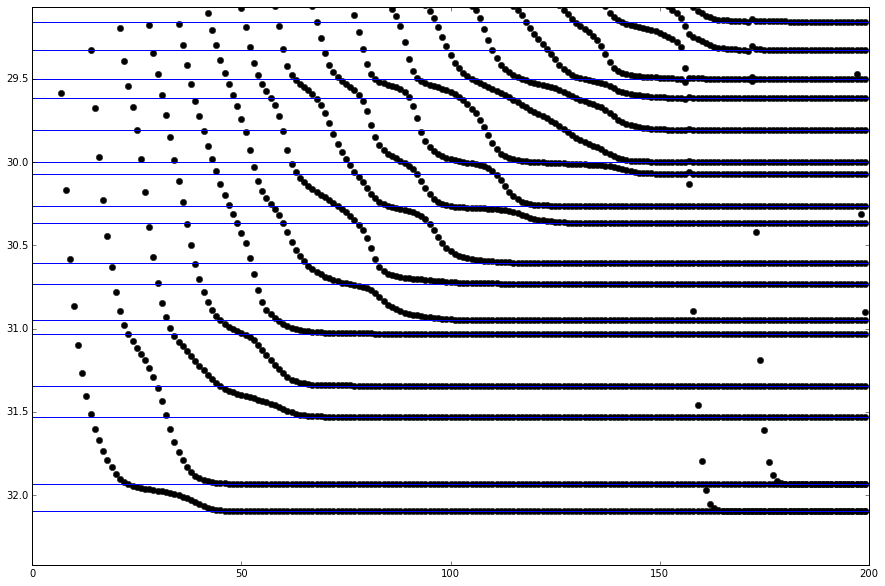

In [61]:
plt.figure(figsize=(15,10))

t=np.diag(alphas[:],0)+np.diag(betas[1:],1)+np.diag(betas[1:],-1)

for i in xrange(2,M):
    plt.plot(i*np.ones(i),np.linalg.eigvalsh(t[:i,:i]),'ok')


for i in xrange(20):
    plt.axhline(evs[-(1+i)])
plt.ylim(1.01*evs[-1],1.01*evs[-20]);